In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from IPython import display
import torch.optim as optim
import argparse

# X = np.load("../sudoku_array_data/target_64k_images.npy")
# labels = np.load("results/kmeans-minibatch/kmeans_mb_qt9c_labels.npy")


X = np.load("results/kmeans-sampled_15k/dataX_kmeans_sampled_qt9c.npy")
labels = np.load("results/kmeans-sampled_15k/kmeans_sampled_qt9c_labels.npy")


In [4]:
X = (X)/255.

print(X.shape)
print(X)
print(labels.shape)
print(labels)


(135000, 784)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(135000,)
[0 0 0 ... 8 8 8]


class = 0


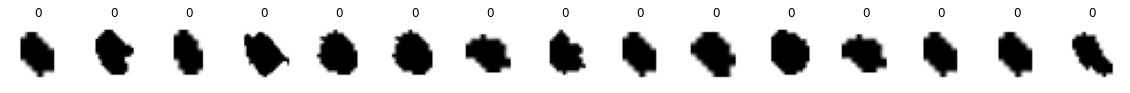

class = 1


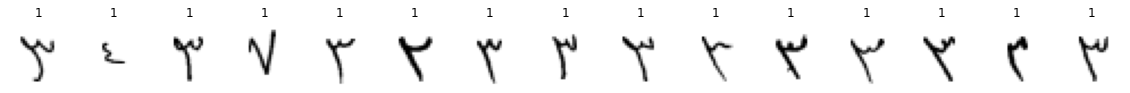

class = 2


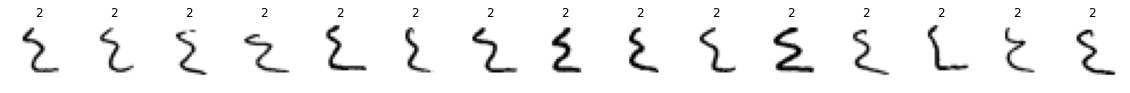

class = 3


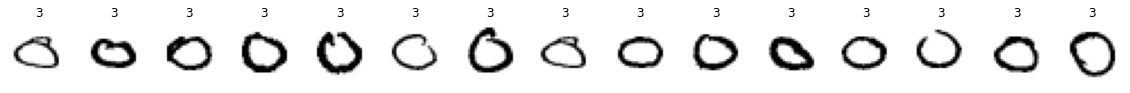

class = 4


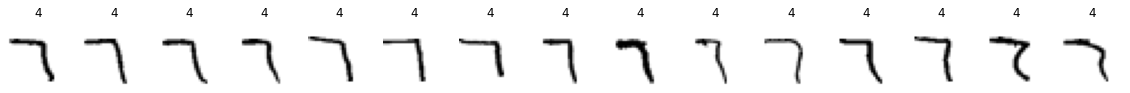

class = 5


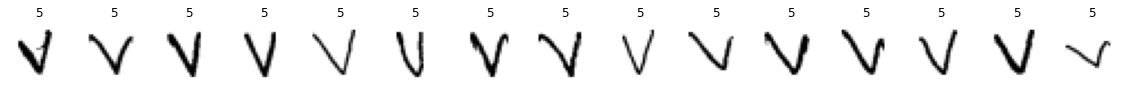

class = 6


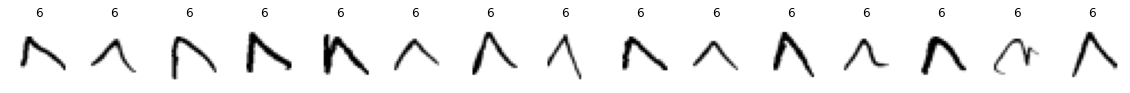

class = 7


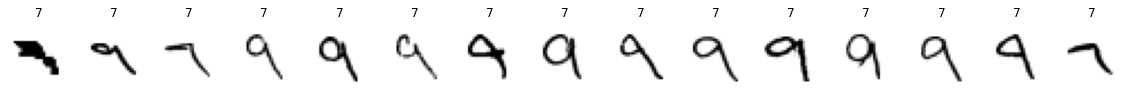

class = 8


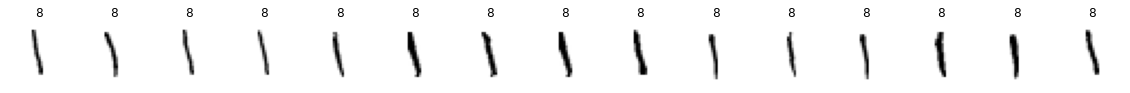

In [6]:
for i in range(np.unique(labels).shape[0]):
    print('class = {}'.format(i))
    X_class = X[labels == i]    

    plt.figure(figsize=(20,5))

    # random_ind = [200, 20000, 50000, 100, 1000, 10000]
    random_ind = [800*i for i in range(15)]
    # random_ind = [i for i in range(2020, 2040)]
    # random_ind = [2*i for i in range(20)]
    for j, image_index in enumerate(random_ind):
        plt.subplot(1,len(random_ind),j+1)
        plt.title(i)

        y = X_class[image_index]
        y = y.reshape((28,28))
        plt.imshow(y, cmap='gray')
        plt.axis('off')


    plt.show()

In [7]:
!ls


A2_RRN.ipynb		   unetOgan.e2346420  unetOgan.o2346425
A2_cGAN.ipynb		   unetOgan.e2346422  unetOgan.o2346646
CGAN_mnist_maxout.ipynb    unetOgan.e2346425  unetOgan.o2346648
README.md		   unetOgan.e2346646  unetOgan.o2346654
RRN			   unetOgan.e2346648  unetOgan.o2346657
X[0].jpg		   unetOgan.e2346654  unetOgan.o2346658
X[640k].jpg		   unetOgan.e2346657  unetOgan.o2346768
backup_RRN		   unetOgan.e2346658  unetOgan.o2346875
cGAN			   unetOgan.e2346768  unetOgan.o2346876
classifier_arabicmnist.py  unetOgan.e2346875  unetOgan.o2346932
clustering		   unetOgan.e2346876  unetOgan.o2347113
label2symbolic_sudoku.py   unetOgan.e2346932  unetOgan.o2347115
load_sudoku_data.py	   unetOgan.e2347113  vggnet_embeddings.py
numpy2images.py		   unetOgan.e2347115  visualize_data.py
results			   unetOgan.o2346418  visualize_images.ipynb
run.sh			   unetOgan.o2346420
unetOgan.e2346418	   unetOgan.o2346422


In [14]:
x = np.load("/home/ee/btech/ee1180957/scratch/Harman/DL-ASS2/COL870-Assignment-2/results/GAN_out/E8_querandtarget_150epochs/gen9k.npy")

In [15]:
print(x.shape)

(9000, 784)


In [16]:
print(x[4])

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

(-0.5, 27.5, 27.5, -0.5)

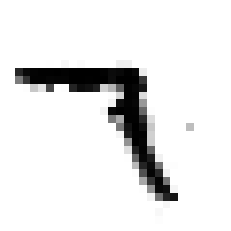

In [17]:
y = x[4]
y = y.reshape((28,28))
plt.imshow(y, cmap='gray')
plt.axis('off')